Loading data from: /workspace/data/vehicle_updates.csv

✅ Data loaded successfully: 12,202,966 rows


,timestamp_utc,vehicle_id,route_id,lat,lon,speed,heading,vehicle_timestamp,last_stop_id,delay_seconds
0,2025-10-11 21:29:36,VehiclePosition-BKK_100,1050,47.496964,19.033392,0.000000,76.0,2025-10-11 21:29:23,F00083,NaN
1,2025-10-11 21:29:36,VehiclePosition-BKK_1002,1840,47.434105,19.182928,0.000000,190.0,2025-10-11 21:29:28,F03634,NaN
2,2025-10-11 21:29:36,VehiclePosition-BKK_101,1050,47.490974,19.014021,0.000000,108.0,2025-10-11 21:29:30,F02294,NaN
3,2025-10-11 21:29:36,VehiclePosition-BKK_104,2160,47.473526,19.028996,4.629996,73.0,2025-10-11 21:29:22,NaN,NaN
4,2025-10-11 21:29:36,VehiclePosition-BKK_106,9999,47.473969,19.026314,0.000000,331.0,2025-10-11 21:24:57,NaN,NaN



--- Data Overview ---
Time range: 2025-10-11 21:29:36  →  2025-10-19 08:23:34
Unique vehicles: 2729
Unique routes: 424
Average speed: 4.59 km/h
Records with delay info: 0


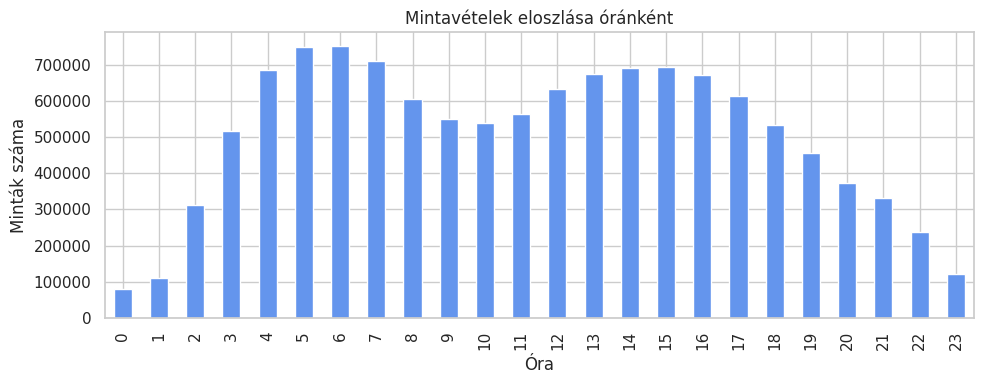

/tmp/ipykernel_22/2335363061.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="crest")


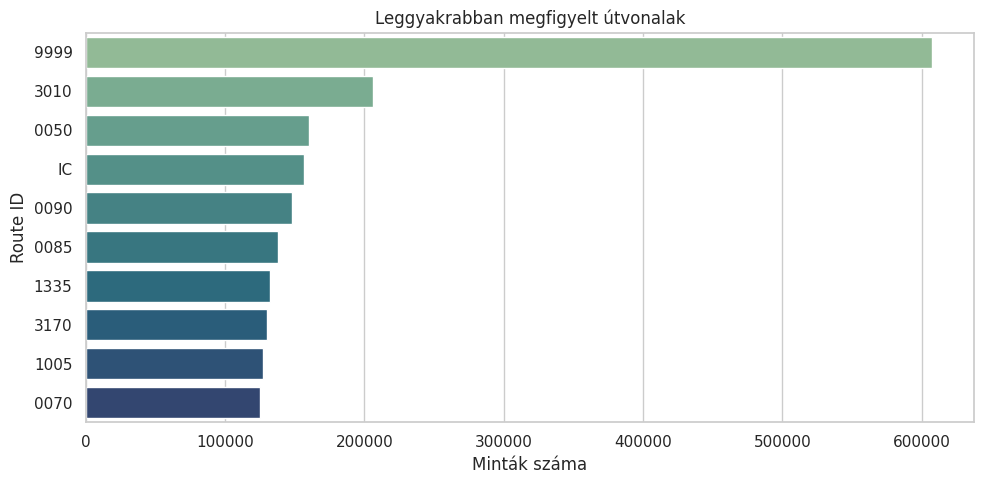

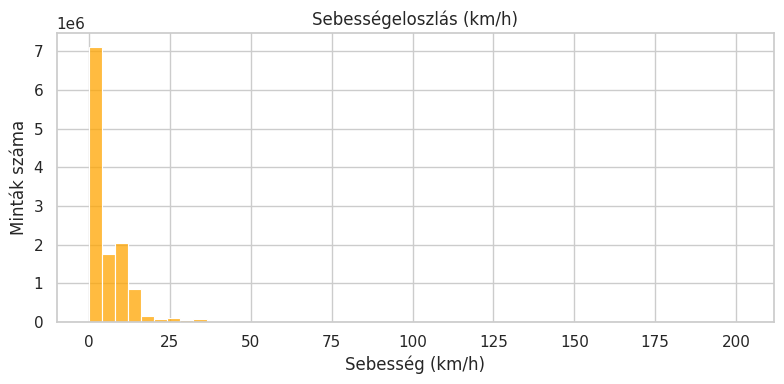

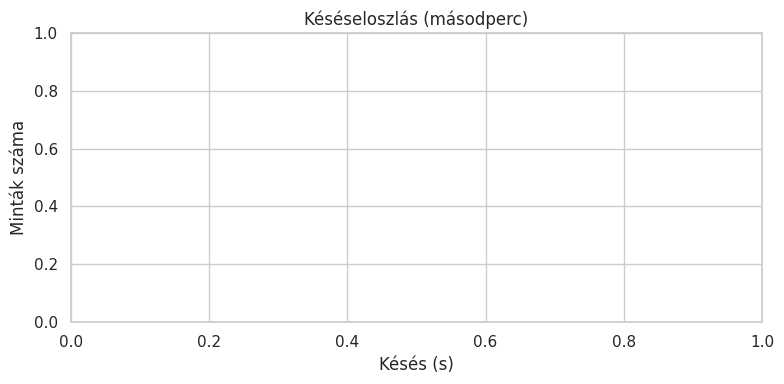

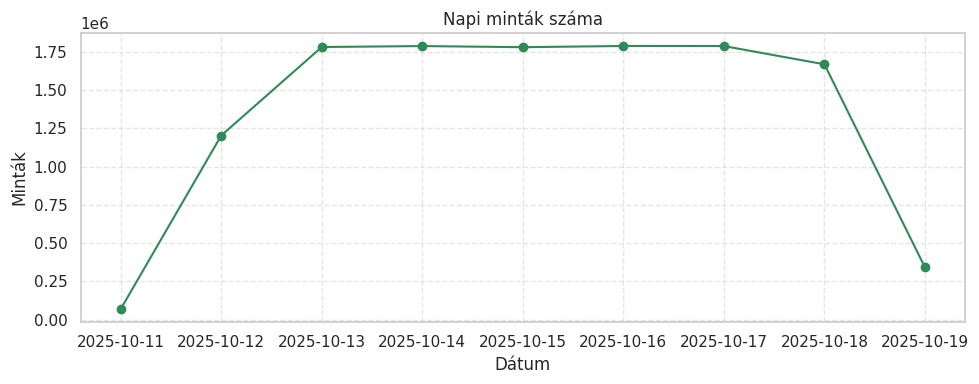


--- Summary ---
Összes rekord: 12,202,966
Időtartam: 2025-10-11 21:29:36 → 2025-10-19 08:23:34
Járművek száma: 2729
Útvonalak száma: 424
Sebességátlag: 4.59 km/h
Késésadatokkal rendelkező sorok: 0

✅ Data exploration complete.


In [2]:
# ============================================
# BKK Vehicle Data Overview and Visualization
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- Alapbeállítások ---
DATA_PATH = "/workspace/data/vehicle_updates.csv"
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# --- 1️⃣ Adatok betöltése ---
print("Loading data from:", DATA_PATH)
df = pd.read_csv(DATA_PATH)

print(f"\n✅ Data loaded successfully: {len(df):,} rows")
display(df.head())

# --- 2️⃣ Alap információk ---
print("\n--- Data Overview ---")
print(f"Time range: {df['timestamp_utc'].min()}  →  {df['timestamp_utc'].max()}")
print(f"Unique vehicles: {df['vehicle_id'].nunique()}")
print(f"Unique routes: {df['route_id'].nunique()}")
print(f"Average speed: {df['speed'].mean():.2f} km/h")
print(f"Records with delay info: {df['delay_seconds'].notna().sum()}")

# --- 3️⃣ Dátum konverzió és időbeli statisztika ---
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], errors="coerce")
df["date"] = df["timestamp_utc"].dt.date
df["hour"] = df["timestamp_utc"].dt.hour

# --- 4️⃣ Mintavételek időbeli eloszlása ---
samples_per_hour = df.groupby("hour").size()

plt.figure(figsize=(10,4))
samples_per_hour.plot(kind="bar", color="cornflowerblue")
plt.title("Mintavételek eloszlása óránként")
plt.xlabel("Óra")
plt.ylabel("Minták száma")
plt.tight_layout()
plt.show()

# --- 5️⃣ Route gyakoriságok ---
top_routes = df["route_id"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="crest")
plt.title("Leggyakrabban megfigyelt útvonalak")
plt.xlabel("Minták száma")
plt.ylabel("Route ID")
plt.tight_layout()
plt.show()

# --- 6️⃣ Sebességeloszlás ---
plt.figure(figsize=(8,4))
sns.histplot(df["speed"].dropna(), bins=50, color="orange")
plt.title("Sebességeloszlás (km/h)")
plt.xlabel("Sebesség (km/h)")
plt.ylabel("Minták száma")
plt.tight_layout()
plt.show()

# --- 7️⃣ Késések alakulása ---
if "delay_seconds" in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df["delay_seconds"].dropna(), bins=50, color="tomato")
    plt.title("Késéseloszlás (másodperc)")
    plt.xlabel("Késés (s)")
    plt.ylabel("Minták száma")
    plt.tight_layout()
    plt.show()

# --- 8️⃣ Adatmennyiség idő szerint ---
daily_samples = df.groupby("date").size()

plt.figure(figsize=(10,4))
daily_samples.plot(marker="o", color="seagreen")
plt.title("Napi minták száma")
plt.xlabel("Dátum")
plt.ylabel("Minták")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- 9️⃣ Összegzés ---
print("\n--- Summary ---")
print(f"Összes rekord: {len(df):,}")
print(f"Időtartam: {df['timestamp_utc'].min()} → {df['timestamp_utc'].max()}")
print(f"Járművek száma: {df['vehicle_id'].nunique()}")
print(f"Útvonalak száma: {df['route_id'].nunique()}")
print(f"Sebességátlag: {df['speed'].mean():.2f} km/h")
print(f"Késésadatokkal rendelkező sorok: {df['delay_seconds'].notna().sum():,}")

print("\n✅ Data exploration complete.")
